<a href="https://colab.research.google.com/github/muhammadhafiz27/DIF62130_A_25_2311532007_MuhammadHafiz/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [ ]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/muhammadhafiz27/DIF62130_A_25_2311532007_MuhammadHafiz/refs/heads/main/Dataset/diabetes.csv'
df = pd.read_csv(dataset_url)

#display dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Kode Python di atas menggunakan pustaka pandas untuk memuat dan menampilkan dataset diabetes.csv dari URL yang diberikan melalui link Github

# **Selecting Features**

In [ ]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df[features_cols] #Features
y = df.Outcome #Target Variable

Kode ini digunakan untuk memisahkan fitur (X) dan target (y) dalam dataset diabetes. Berikut penjelasan lebih rinci:

1. features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

  Mendefinisikan daftar nama kolom yang akan digunakan sebagai fitur (features) dalam analisis atau model machine learning.

2. x = df[features_cols]

  Membuat variabel X yang berisi subset dari DataFrame df, hanya mencakup kolom yang disebutkan dalam features_cols.

  X adalah variabel independen yang digunakan sebagai input dalam model.

3. y = df.Outcome

  Membuat variabel y, yang berisi kolom Outcome dari dataset df.
  
  y adalah variabel dependen atau target, yang biasanya digunakan dalam klasifikasi untuk memprediksi apakah seseorang menderita diabetes atau tidak.

In [ ]:
print(x.shape)
print(y.shape)

(768, 7)
(768,)


Kode berikut digunakan untuk melihat dimensi (shape) dari variabel X dan y dalam dataset

1. x.shape → Menampilkan ukuran (jumlah baris dan kolom) dari X (data fitur).
2. y.shape → Menampilkan ukuran dari y (data target).

# **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

Kode ini digunakan untuk membagi dataset menjadi data training dan testing dengan menggunakan train_test_split dari pustaka scikit-learn.

1. from sklearn.model_selection import train_test_split

  Mengimpor fungsi train_test_split dari pustaka scikit-learn, yang digunakan untuk membagi dataset.

2. x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

  x_train & y_train → Data latih (training), digunakan untuk melatih model.

  x_test & y_test → Data uji (testing), digunakan untuk mengevaluasi model.

  test_size=0.30 → 30% dari dataset digunakan untuk pengujian, sedangkan 70% untuk pelatihan.

  random_state=16 → Seed untuk pengacakan, memastikan bahwa pemisahan dataset selalu sama setiap kali kode dijalankan.

# **Model Development and Prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

Kode ini menerapkan model Logistic Regression untuk klasifikasi pada dataset yang telah dibagi sebelumnya.

1. from sklearn.linear_model import LogisticRegression

  Mengimpor kelas LogisticRegression dari pustaka scikit-learn, yang digunakan untuk klasifikasi biner atau multikelas.

2. logreg = LogisticRegression(random_state=16)

  Membuat objek model Logistic Regression dengan random_state=16 agar hasil tetap konsisten setiap kali dijalankan.

3. logreg.fit(x_train, y_train)

  Melatih (training) model dengan data latih (x_train dan y_train).

  Model akan belajar dari pola yang terdapat pada fitur (X) untuk memprediksi target (y).

4. y_pred = logreg.predict(x_test)

  Menggunakan model yang sudah dilatih untuk memprediksi nilai y (Outcome) berdasarkan x_test.

  Hasil prediksi ini disimpan dalam variabel y_pred, yang nantinya bisa dibandingkan dengan y_test untuk mengevaluasi akurasi model.

# **Model Evaluating using Confusion Matrix**

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

Kode ini membuat Confusion Matrix untuk mengevaluasi performa model Logistic Regression dalam mengklasifikasikan data uji.

1. from sklearn import metrics

  Mengimpor pustaka metrics dari scikit-learn, yang menyediakan berbagai metode evaluasi model.

2. cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

  Menghitung Confusion Matrix dengan membandingkan y_test (label asli) dengan y_pred (prediksi model).

  Hasilnya disimpan dalam variabel cnf_matrix.

3. cnf_matrix

  Menampilkan Confusion Matrix dalam bentuk array (numpy).


Text(0.5, 427.9555555555555, 'Predicted Label')

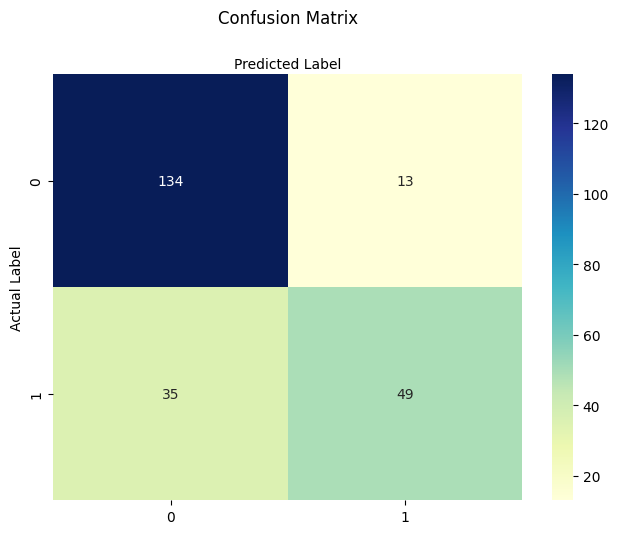

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1] #name of classes
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Kode ini digunakan untuk memvisualisasikan Confusion Matrix dalam bentuk heatmap menggunakan Seaborn dan Matplotlib.

1. Mengimpor pustaka yang diperlukan

  NumPy (np) → Digunakan untuk membuat array indeks kelas.

  Matplotlib (plt) → Digunakan untuk membuat plot.

  Seaborn (sns) → Digunakan untuk membuat heatmap agar lebih mudah dibaca.
  
2. Menentukan label kelas

  Dataset ini adalah klasifikasi biner, jadi labelnya 0 (Negatif) dan 1 (Positif).

3. Membuat figure dan axis untuk plotting

  Membuat objek figure dan axis untuk plotting menggunakan Matplotlib.

4. Menentukan label sumbu x dan y

  Menentukan posisi label kelas di sumbu x dan y.

5. Membuat heatmap dengan Seaborn

  pd.DataFrame(cnf_matrix) → Mengubah Confusion Matrix menjadi DataFrame agar kompatibel dengan Seaborn.
  
  annot=True → Menampilkan angka dalam setiap sel.
  
  cmap='YlGnBu' → Menggunakan warna Yellow-Green-Blue untuk heatmap.

  fmt='g' → Format angka dalam sel sebagai bilangan bulat.

6. Menyesuaikan tampilan heatmap

  ax.xaxis.set_label_position('top')  # Menempatkan label X di atas

  plt.tight_layout()  # Menghindari tumpang tindih elemen

  plt.title('Confusion Matrix', y=1.1)  # Menambahkan judul

  plt.ylabel('Actual Label')  # Menambahkan label sumbu Y

  plt.xlabel('Predicted Label')  # Menambahkan label sumbu X


# **Confusion Matrix Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



Kode ini digunakan untuk menampilkan laporan klasifikasi yang mencakup akurasi, precision, recall, dan F1-score dari model Logistic Regression.

1. from sklearn.metrics import classification_report

  Mengimpor fungsi classification_report dari pustaka scikit-learn, yang digunakan untuk mengevaluasi performa model klasifikasi.

2. target_names = ['without diabetes', 'with diabetes']

  Mendefinisikan label kelas agar lebih mudah dipahami:

        'without diabetes' → Kelas 0 (tidak terkena diabetes).
        'with diabetes' → Kelas 1 (terkena diabetes).

3. print(classification_report(y_test, y_pred, target_names=target_names))

  Membandingkan nilai asli (y_test) dengan hasil prediksi (y_pred) untuk menghasilkan metrik evaluasi dalam bentuk tabel.

# **ROC Curve**

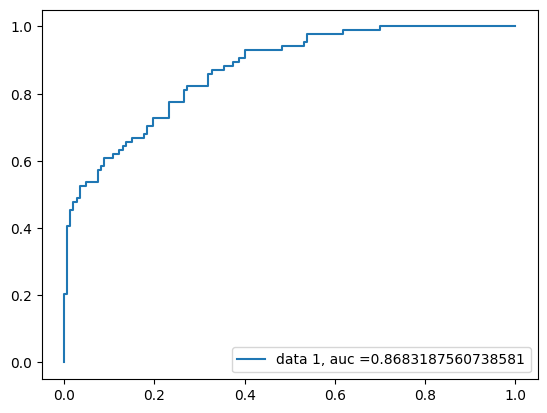

In [ ]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc ="+ str(auc))
plt.legend(loc=4)
plt.show()

Kode ini digunakan untuk memplot kurva ROC (Receiver Operating Characteristic) dan menghitung AUC (Area Under Curve) sebagai evaluasi model Logistic Regression.

1. y_pred_proba = logreg.predict_proba(x_test)[::,1]

  predict_proba(x_test) menghasilkan probabilitas untuk setiap kelas (0 dan 1).

  [::,1] mengambil probabilitas kelas 1 (diabetes) sebagai nilai prediksi probabilistik.

2. fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

  roc_curve() menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) untuk berbagai threshold.

3. auc = metrics.roc_auc_score(y_test, y_pred_proba)

  roc_auc_score() menghitung Area Under Curve (AUC), yang menunjukkan seberapa baik model membedakan antara kelas.

4. plt.plot(fpr, tpr, label="data 1, auc ="+ str(auc))

  Membuat grafik ROC Curve dengan sumbu FPR (X-axis) dan TPR (Y-axis).

  Menampilkan nilai AUC di dalam legenda.

5. plt.legend(loc=4)

  Menempatkan legenda di sudut kanan bawah grafik.

6. plt.show()

  Menampilkan grafik ROC Curve.

Makna AUC (Area Under Curve):

* AUC = 1.0 → Model sempurna (100% akurat).
* AUC > 0.9 → Model sangat baik.
* AUC ≈ 0.8 - 0.9 → Model cukup baik.
* AUC ≈ 0.7 - 0.8 → Model bisa diterima, tetapi perlu perbaikan.
* AUC < 0.7 → Model kurang bagus, perlu tuning atau metode lain.
* AUC ≈ 0.5 → Model tidak lebih baik dari tebakan acak.

# **Area Under Curve**